In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [4]:
from keras.utils import to_categorical

In [5]:
from keras.datasets import cifar10

In [6]:
from keras.callbacks import EarlyStopping

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 161s 1us/step


In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
32 * 32 * 3

3072

In [11]:
objects = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

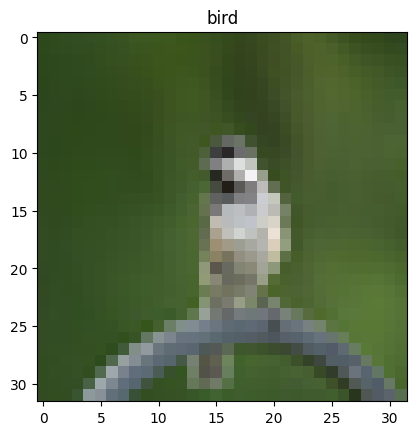

In [31]:
img_index = 54
obj = objects[y_train[img_index][0]]
plt.title(obj)
plt.imshow(X_train[img_index])
plt.show()

In [33]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32, 32, 3), filters=5, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(filters=10, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(filters=20, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.2))
# cnn.add(MaxPooling2D())

cnn.add(Conv2D(filters=40, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D())

cnn.add(Flatten())

cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 5)         140       
                                                                 
 dropout_5 (Dropout)         (None, 30, 30, 5)         0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 5)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 10)        460       
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 10)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 10)          0         
 g2D)                                                 

In [34]:
X_train = X_train / 255
X_test = X_test / 255

In [35]:
y_train = to_categorical(y_train)

In [36]:
cnn.fit(X_train, y_train, epochs=20, validation_split=0.15)

Epoch 1/20
1329/1329 [==============================] - 22s 15ms/step - loss: 1.8406 - acc: 0.3053 - val_loss: 1.7576 - val_acc: 0.3592
Epoch 2/20
1329/1329 [==============================] - 22s 16ms/step - loss: 1.5945 - acc: 0.4122 - val_loss: 1.6125 - val_acc: 0.4528
Epoch 3/20
1329/1329 [==============================] - 18s 13ms/step - loss: 1.5056 - acc: 0.4508 - val_loss: 1.5630 - val_acc: 0.4344
Epoch 4/20
1329/1329 [==============================] - 19s 14ms/step - loss: 1.4549 - acc: 0.4720 - val_loss: 1.5675 - val_acc: 0.4435
Epoch 5/20
1329/1329 [==============================] - 18s 14ms/step - loss: 1.4190 - acc: 0.4853 - val_loss: 1.4685 - val_acc: 0.4868
Epoch 6/20
1329/1329 [==============================] - 21s 16ms/step - loss: 1.3925 - acc: 0.4981 - val_loss: 1.4984 - val_acc: 0.4729
Epoch 7/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.3622 - acc: 0.5100 - val_loss: 1.3950 - val_acc: 0.5167
Epoch 8/20
1329/1329 [==========================

In [37]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [39]:
y_pred[1] * 100

array([1.0846980e+01, 3.5905571e+01, 1.0929476e-01, 8.0737643e-02,
       1.3328128e-01, 1.2427596e-02, 7.9108141e-02, 1.9031320e-02,
       4.8213615e+01, 4.5999479e+00], dtype=float32)

In [40]:
np.max(y_pred[1])

0.48213616

In [41]:
np.argmax(y_pred[1])

8

In [46]:
y_pred_class = np.argmax(y_pred, axis=1)

In [49]:
y_pred_proba = np.max(y_pred, axis=1)

In [47]:
y_pred_class

array([3, 8, 8, ..., 5, 7, 7], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.39      0.53      1000
           1       0.83      0.46      0.59      1000
           2       0.53      0.36      0.43      1000
           3       0.28      0.66      0.40      1000
           4       0.37      0.72      0.49      1000
           5       0.62      0.27      0.37      1000
           6       0.65      0.65      0.65      1000
           7       0.74      0.44      0.55      1000
           8       0.61      0.73      0.66      1000
           9       0.66      0.52      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.61      0.52      0.52     10000
weighted avg       0.61      0.52      0.52     10000



In [57]:
objects

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

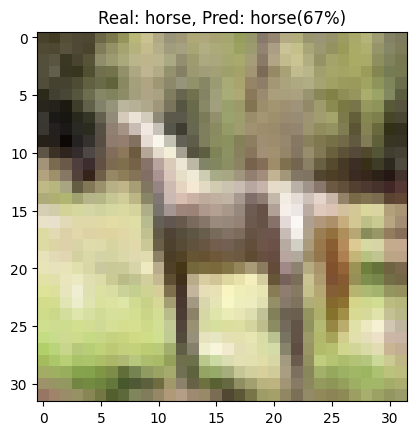

In [58]:
img_index = 5445
obj = objects[y_test[img_index][0]]
pred_obj = y_pred_class[img_index]
pred_obj = objects[pred_obj]
proba = round(y_pred_proba[img_index], 2) * 100
message = f'Real: {obj}, Pred: {pred_obj}({int(proba)}%)'
plt.title(message)
plt.imshow(X_test[img_index])
plt.show()